In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
import ipywidgets as widgets

In [4]:
def f(o): print('Hi')

In [5]:
w = widgets.Button(description = 'Click Me!')

In [6]:
w

Button(description='Click Me!', style=ButtonStyle())

In [7]:
w.on_click(f)

In [8]:
from time import sleep

In [9]:
def slow_calculation():
    res = 0
    for i in range(5):
        res += i*i
        sleep(1)
    return res

In [10]:
slow_calculation()

30

In [11]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        res += i*i
        sleep(1)
        if cb : cb(i)
    return res

In [12]:
def show_progress(epoch):
    print(f"Awesome! We've finished epoch {epoch}")

In [13]:
slow_calculation(cb=show_progress)

Awesome! We've finished epoch 0
Awesome! We've finished epoch 1
Awesome! We've finished epoch 2
Awesome! We've finished epoch 3
Awesome! We've finished epoch 4


30

In [14]:
slow_calculation(lambda o: print(f"Awesome! We've finished epoch {o}"))

Awesome! We've finished epoch 0
Awesome! We've finished epoch 1
Awesome! We've finished epoch 2
Awesome! We've finished epoch 3
Awesome! We've finished epoch 4


30

In [15]:
def show_progress(exclaimation, epoch):
    print(f"{exclaimation}! We've finished epoch {epoch}")

In [16]:
slow_calculation(lambda o: show_progress('Ok I guess', o))

Ok I guess! We've finished epoch 0
Ok I guess! We've finished epoch 1
Ok I guess! We've finished epoch 2
Ok I guess! We've finished epoch 3
Ok I guess! We've finished epoch 4


30

In [17]:
def make_show_progress(exclaimation):
    _inner = lambda o: print(f"{exclaimation}! We've finished epoch {o}")
    return _inner

In [18]:
slow_calculation(make_show_progress('Nice'))

Nice! We've finished epoch 0
Nice! We've finished epoch 1
Nice! We've finished epoch 2
Nice! We've finished epoch 3
Nice! We've finished epoch 4


30

In [19]:
f2 = make_show_progress('Terrific')

In [20]:
slow_calculation(f2)

Terrific! We've finished epoch 0
Terrific! We've finished epoch 1
Terrific! We've finished epoch 2
Terrific! We've finished epoch 3
Terrific! We've finished epoch 4


30

In [21]:
from functools import partial

In [22]:
slow_calculation(partial(show_progress,'Ok I guess'))

Ok I guess! We've finished epoch 0
Ok I guess! We've finished epoch 1
Ok I guess! We've finished epoch 2
Ok I guess! We've finished epoch 3
Ok I guess! We've finished epoch 4


30

In [23]:
class ProgressShowingCallback():
    def __init__(self, exclaimation='Awesome'): self.exclaimation = exclaimation
    def __call__(self, epoch): print(f"{self.exclaimation}! We've finished epoch {epoch}")

In [24]:
cb = ProgressShowingCallback()

In [25]:
slow_calculation(cb)

Awesome! We've finished epoch 0
Awesome! We've finished epoch 1
Awesome! We've finished epoch 2
Awesome! We've finished epoch 3
Awesome! We've finished epoch 4


30

In [26]:
def f(*args, **kwargs): print(f"args: {args}, kwargs: {kwargs}")

In [27]:
f(3, 'a', val='blue')

args: (3, 'a'), kwargs: {'val': 'blue'}


In [28]:
def slow_calculation(cb = None):
    res = 0
    for i in range(5):
        if cb: cb.before_step(i)
        res += i*i
        sleep(1)
        if cb: cb.after_step(i, val=res)
    return res
        

In [29]:
class PrintStepCallback():
    def __init__(self): pass
    def before_step(self, *args, **kwargs): print("About to start")
    def after_step(self, *args, **kwargs): print("Done")

In [30]:
slow_calculation(PrintStepCallback())

About to start
Done
About to start
Done
About to start
Done
About to start
Done
About to start
Done


30

In [31]:
class PrintStatusCallback():
    def __init__(self): pass
    def before_step(self, epoch, *args, **kwargs): print(f"About to start {epoch}")
    def after_step (self, epoch, val, *args, **kwargs): print(f"After {epoch}:{val}")

In [32]:
slow_calculation(PrintStatusCallback())

About to start 0
After 0:0
About to start 1
After 1:1
About to start 2
After 2:5
About to start 3
After 3:14
About to start 4
After 4:30


30

In [33]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        if cb and hasattr(cb,'before_calc'): cb.before_calc(i)
        res += i*i
        sleep(1)
        if cb and hasattr(cb,'after_calc'):
            if cb.after_calc(i, res):
                print("stopping early")
                break
    return res

In [34]:
class PrintAfterCallback():
    def after_calc (self, epoch, val):
        print(f"After {epoch}: {val}")
        if val>10: return True

In [35]:
slow_calculation(PrintAfterCallback())

After 0: 0
After 1: 1
After 2: 5
After 3: 14
stopping early


14

In [36]:
class SlowCalculator():
    def __init__(self, cb=None): self.cb,self.res = cb,0
    
    def callback(self, cb_name, *args):
        if not self.cb: return
        cb = getattr(self.cb,cb_name, None)
        if cb: return cb(self, *args)

    def calc(self):
        for i in range(5):
            self.callback('before_calc', i)
            self.res += i*i
            sleep(1)
            if self.callback('after_calc', i):
                print("stopping early")
                break         

In [37]:
class ModifyingCallback():
    def after_step(self, calc, epoch):
        print(f'After {epoch}: {calc.res}')
        if calc.res>10: return True
        if calc.res<3: calc.res = calc.res*2

In [38]:
calculator = SlowCalculator(ModifyingCallback())

In [39]:
calculator.calc()
calculator.res

30

In [42]:
class SloppyAdder():
    def __init__(self, o): self.o = o
    def __add__(self, b): return SloppyAdder(self.o + b.o + 0.01)
    def __repr__(self): return str(self.o)

In [45]:
a = SloppyAdder(1)
b = SloppyAdder(2)
a + b 

3.01

In [46]:
t = torch.tensor([1., 2., 4., 18.])

In [47]:
m = t.mean(); m

tensor(6.2500)

In [48]:
(t - m).mean()

tensor(0.)

In [51]:
(t - m).pow(2).mean()

tensor(47.1875)

In [54]:
(t - m).abs().mean()

tensor(5.8750)

In [55]:
(t - m).pow(2).mean().sqrt()

tensor(6.8693)

In [63]:
(t-m).pow(2).mean(), (t*t).mean() - m*m

(tensor(47.1875), tensor(47.1875))

In [64]:
t

tensor([ 1.,  2.,  4., 18.])

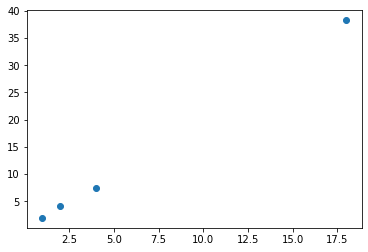

In [65]:
u = t*2
u *= torch.randn_like(t)/10 +0.95
plt.scatter(t, u)

In [66]:
prod = (t - t.mean())* (u - u.mean())

In [67]:
prod

tensor([ 57.6447,  37.7532,  12.3351, 297.8076])

In [68]:
prod.mean()

tensor(101.3852)

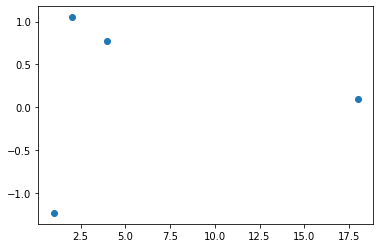

In [69]:
v = torch.randn_like(t)
plt.scatter(t, v);

In [70]:
((t-t.mean())*(v-v.mean())).mean()

tensor(0.3646)

In [71]:
cov = (t*v).mean() - t.mean()*v.mean(); cov

tensor(0.3646)

In [72]:
cov / (t.std() * v.std())

tensor(0.0453)

In [73]:
def log_softmax(x): return x - x.exp().sum(-1,keepdim=True).log()